## Import Modules

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load in file

In [70]:
df = pd.read_csv('NoPCA_vs_PCA.csv')
iq = pd.read_csv('IQ.csv')

,Unnamed: 0,Addictive,Anxiety,Mood,OCD,Schizophrenia,Trauma and Stress-Related
0,Without PCA,0.500486,0.496873,0.488624,0.487103,0.516450,0.494841
1,With PCA,0.749271,0.877104,0.900000,0.675099,0.886147,0.894048
2,SD No PCA,0.117543,0.174037,0.112292,0.166598,0.130910,0.132798
3,SD PCA,0.091199,0.079396,0.087542,0.203155,0.036660,0.054336


## Plot AUCs for No PCA vs PCA

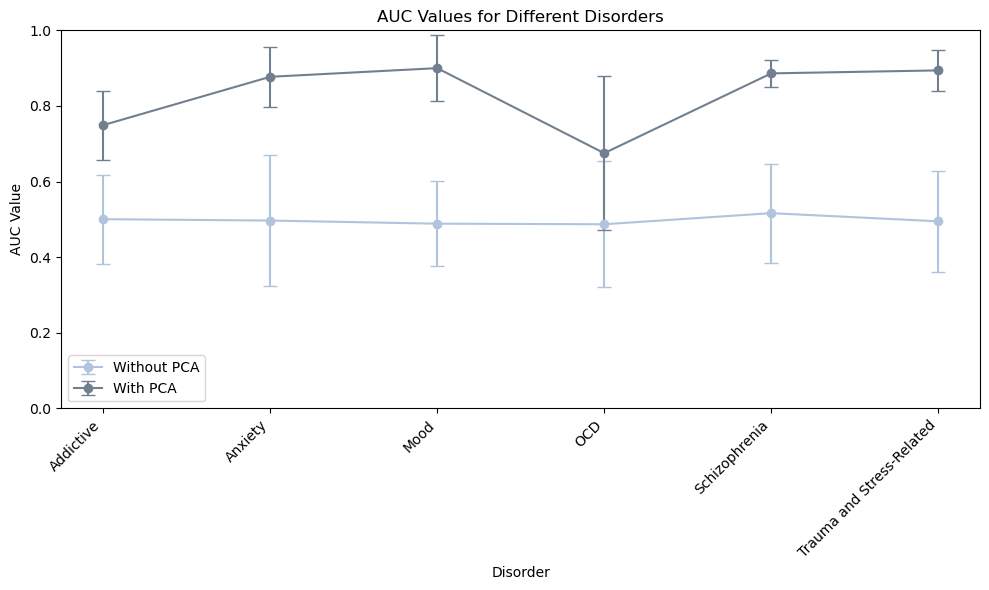

In [73]:
disorders = df.columns[1:]  # skip the first column
x = np.arange(len(disorders))

# Extract rows
without_pca = df.iloc[0, 1:].astype(float)
with_pca = df.iloc[1, 1:].astype(float)
std_without = df.iloc[2, 1:].astype(float)
std_with = df.iloc[3, 1:].astype(float)

# Plot with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(x, without_pca, yerr=std_without, label='Without PCA', 
             marker='o', capsize=5, linestyle='-', color='lightsteelblue')
plt.errorbar(x, with_pca, yerr=std_with, label='With PCA', 
             marker='o', capsize=5, linestyle='-', color='slategray')

# Final touches
plt.xticks(x, disorders, rotation=45, ha='right')
plt.ylabel("AUC Value")
plt.xlabel("Disorder")
plt.title("AUC Values for Different Disorders")
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

## AUC for Different Features

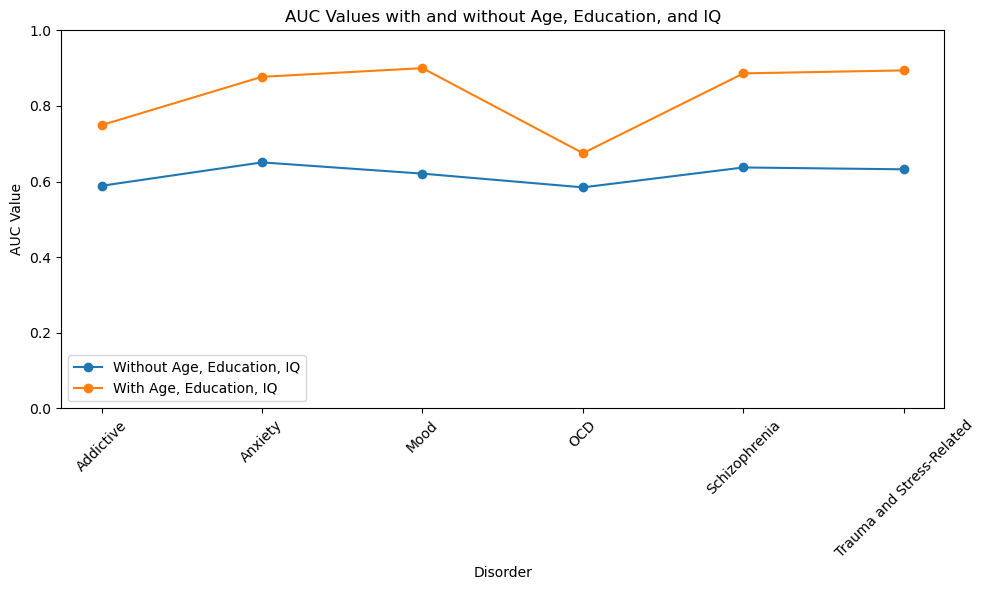

In [64]:
x = iq.columns[1:]  

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, iq.iloc[0, 1:], label=iq.iloc[0, 0], marker='o')  # Without IQ
plt.plot(x, iq.iloc[1, 1:], label=iq.iloc[1, 0], marker='o')  # With IQ

plt.title("AUC Values with and without Age, Education, and IQ")
plt.xlabel("Disorder")
plt.ylabel("AUC Value")
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()